# ECE1508: Applied Deep Learning
# Assignment 1
## Keshvari, Hooman

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

Try an example

In [ ]:
np.ones(3)

array([1., 1., 1.])

## Programming Question 1

In [ ]:
class LinearMachine():
    def __init__(self):
        # Define weights as attribute
        # Set the initial values randomly

        # ============ COMPLETE HERE ================
        # self._weights = ## COMPLETE ##
        # ============================================
        self._weights = np.random.uniform(low=0.1, size=2)

    def data_synthesizer(self, dataset_size, velocity_mean, velocity_var,
                         height_mean, height_var):

        # Draw random velocity and height
        # Let the array size to be <dataset_size>
        # Don't forget to make them positive using np.abs()

        # ============ COMPLETE HERE ================
        # v_sample = ## COMPLETE ##
        # h_sample = ## COMPLETE ##
        v_sample = np.abs(np.random.normal(loc=velocity_mean,
                                    scale=np.sqrt(velocity_var),
                                    size=dataset_size))


        h_sample = np.abs(np.random.normal(loc=height_mean,
                                    scale=np.sqrt(height_var),
                                    size=dataset_size))


        # print(v_sample)
        # print(h_sample)
        # print("*************************")


        # Compute distance d via Newton's law
        d_sample = 0.45 * (v_sample * np.sqrt(h_sample))
        # ============================================

        # Make the dataset
        # ============ COMPLETE HERE ================
        dataset = np.column_stack((v_sample, h_sample, d_sample))
        # print(dataset)
        # ============================================

        # read data-points and labels
        # ============ COMPLETE HERE ================
        # x_mat = dataset[:,0:2]
        # v_vec = dataset[:,0]
        # h_vec = dataset[:,1]
        # d_mat = dataset[:,2]
        # V = np.inner(v_vec,v_vec)
        # H = np.inner(h_vec,h_vec)
        # VH = np.inner(v_vec,h_vec)
        # VD = np.inner(v_vec,d_mat)
        # HD = np.inner(h_vec,d_mat)
        # print(dataset)
        # print("weights ---> ", self._weights)
        # print("V VH\nVH H\n", np.array([[V,VH],[VH,H]]))
        # print("\n",np.column_stack([VD,HD]))
        # print("--------------------->")

        # print(np.array([[V,VH],[VH,H]]) @ self._weights - np.column_stack([VD,HD]))

        # print("aaaaaaaaaaaaaaaaaaaaaaaaa")
        # grad = np.array([[V,VH],[VH,H]]) @ self._weights - np.column_stack([VD,HD])
        # print("grad \n",grad)
        return dataset
        # ============================================

    def train_GD(self, dataset, lr, delta = float("inf"), max_iterations = 1e12):

        # We can reset the weights to some initial random values
        # ============ COMPLETE HERE ================
        self._weights = np.random.uniform(low=1, high=2, size=dataset.shape[-1]-1)
        # ============================================

        # read data-points and labels
        # ============ COMPLETE HERE ================
        x_mat = dataset[:,0:2]
        v_vec = dataset[:,0]
        h_vec = dataset[:,1]
        d_mat = dataset[:,2]
        # ============================================
        V = np.inner(v_vec,v_vec)
        H = np.inner(h_vec,h_vec)
        VH = np.inner(v_vec,h_vec)
        VD = np.inner(v_vec,d_mat)
        HD = np.inner(h_vec,d_mat)
        # Count number of iterations to stop after max iterations
        counter = 0

        # Initiate risk
        risk = 0

        while delta > 0.0000000000000001 and counter < max_iterations:

            # Compute Gradient
            # ============ COMPLETE HERE ================

            # print(np.array([[V,VH],[VH,H]]))
            # print(np.column_stack([VD,HD]))
            # print("---------------------")
            grad = 1/len(dataset) * (np.array([[V,VH],[VH,H]]) @ self._weights - np.array(VD,HD))
            # ============================================

            # Save risk at current weights
            # ============ COMPLETE HERE ================
            old_risk = risk
            # ============================================

            # Update weights using GD with learning rate lr
            # ============ COMPLETE HERE ================
            self._weights = self._weights - lr * grad
            # ============================================

            # Compute new risk
            # ============ COMPLETE HERE ================
            risk = 1/len(dataset) * np.linalg.norm(x_mat @ self._weights - d_mat)
            # ============================================

            # Update stopping criteria
            delta = np.abs(risk - old_risk)
            counter += 1
        # print(f"risk is {risk} and weights are : {self._weights}")
        # Print out if the code stops due to max iterations, i.e., GD did not converge
        if counter == max_iterations:
            print(f"GD dos not converge: train_GD hit max iterations = {max_iterations}!")

        return risk


    def train(self, dataset):
          # Find the minimizer
          # ============ COMPLETE HERE ================
          # self._weights = ## COMPLETE ## Multiple lines
          # ============================================
          x_mat = dataset[:,0:2]
          v_vec = dataset[:,0]
          h_vec = dataset[:,1]
          d_mat = dataset[:,2]
          # ============================================
          V = np.inner(v_vec,v_vec)
          H = np.inner(h_vec,h_vec)
          VH = np.inner(v_vec,h_vec)
          VD = np.inner(v_vec,d_mat)
          HD = np.inner(h_vec,d_mat)

          self._weights = (1/(V*H-VH*VH)) * np.array((H*VD - VH * HD, -VH * VD + V * HD))
          # Compute minimum risk
          # ============ COMPLETE HERE ================
          risk_opt = 1/len(dataset) * np.linalg.norm(x_mat @ self._weights - d_mat)
          # ============================================
          # print(f"The minimum risk is {risk_opt} and weights are {self._weights}")
          return risk_opt

    def test(self, J, velocity_mean, velocity_var, height_mean, height_var):

          # Generate an independent dataset for test
          # ============ COMPLETE HERE ================
          dataset = self.data_synthesizer(J, velocity_mean, velocity_var, height_mean, height_var)
          # ============================================
          x_mat = dataset[:,0:2]
          v_vec = dataset[:,0]
          h_vec = dataset[:,1]
          d_mat = dataset[:,2]
          # Compute the risk via the trained weights
          # ============ COMPLETE HERE ================
          risk = 1/J * np.linalg.norm(x_mat @ self._weights - d_mat)
          # ============================================

          # Compute test risk
          # ============ COMPLETE HERE ================
          risk_test = risk
          # ============================================
          return risk_test
# print(LinearMachine().data_synthesizer(3,1,2,1,2)[:,0:2])

### Gradient Descent vs Optimal Training

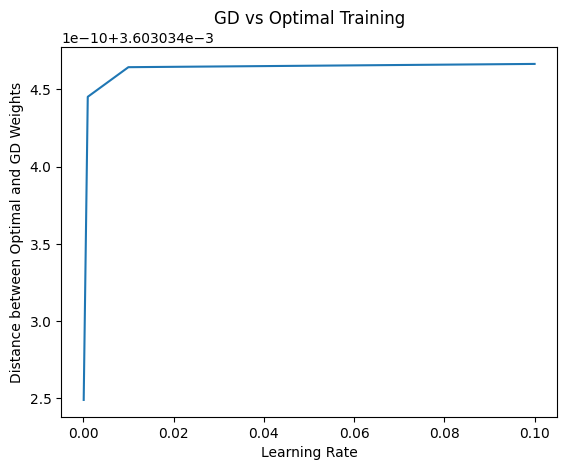

In [ ]:
def Optimality_Gap(lr_list):
    myModel = LinearMachine()
    dataset = myModel.data_synthesizer(100, 1, 5, 3, 3)

    # Initiate optimality gap vector
    Opt_gap = []

    # Find optimal weights
    myModel.train(dataset)
    weights_optimal = myModel._weights

    # Find GD trained weights
    for lr in lr_list:
        # ============ COMPLETE HERE ================
        myModel.train_GD(dataset, lr)
        weights_GD = myModel._weights
        # ============================================

        # Append the optimality gap
        Opt_gap.append(np.linalg.norm(weights_optimal-weights_GD))


    # Plot
    plt.figure()
    plt.plot(lr_list, Opt_gap)
    plt.title('GD vs Optimal Training')
    plt.xlabel('Learning Rate')
    plt.ylabel('Distance between Optimal and GD Weights')

    plt.show()


# Execute your implementation
Optimality_Gap([0.1, 0.01, 0.001, 0.0001])

### Test Loop

Text(0, 0.5, 'Test Risk')

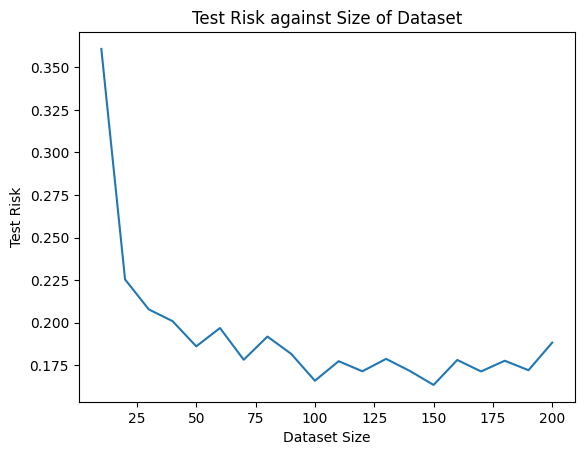

In [ ]:
def eval_model(T, I, J, velocity_mean, velocity_var, height_mean, height_var):
  myModel = LinearMachine()
  lr = 0.001

  # Initiate the risk
  emp_risk = 0

  # Loop over t
  for t in range(T):
    # ============ COMPLETE HERE ================
    dataset = myModel.data_synthesizer(I, velocity_mean, velocity_var, height_mean, height_var)
    myModel.train_GD(dataset,lr)
    emp_risk += myModel.test(J, velocity_mean, velocity_var, height_mean, height_var)
    # # ============================================

  # average rist over datasets
  emp_risk = emp_risk / T

  return emp_risk


# Make list for plot
emp_risk_list = []
T, J = 100, 10

# loop over I
I_list = [10*i for i in range(1,21)]
for I in I_list:
  emp_risk_list.append(eval_model(T, I, J, 1, 5, 3, 3))


# Plot
plt.figure()
plt.plot(I_list, emp_risk_list)
plt.title('Test Risk against Size of Dataset')
plt.xlabel('Dataset Size')
plt.ylabel('Test Risk')


## Programming Question 2

### Perceptron Machine

In [ ]:
class PerceptronMachine():
    def __init__(self):
        # define weights as attribute and initiate randomly
        self._dimensions = 9
        # ============ COMPLETE HERE ================
        # ## COMPLETE ## Multiple lines
        # + 1 is for the bias
        self._weights = np.random.uniform(low=0.1, size=self._dimensions + 1)
        # ============================================


    def forward(self, datapoint):
        # Affine function
        # ============ COMPLETE HERE ================
        # ## COMPLETE ## Multiple lines
        affine = np.inner(self._weights, datapoint)
        # ============================================

        # Activate by step function
        return 1 if affine > 0 else 0

    def train(self, dataset, lr):
        # initiate weights again randomly as we start with training
        # ============ COMPLETE HERE ================
        # ## COMPLETE ## Multiple lines
        self._weights = np.random.uniform(low=0.1, size=self._dimensions + 1)
        # ============================================

        # initiate error_flag with 1 to get to the while loop
        error_flag = 1

        while error_flag > 0:
            # We initially have no error
            error_flag = 0
            for data in dataset:
                # Read data
                x = np.append(data[0], 1)
                label = data[1]

                # Pass it forward
                y = self.forward(x)

                # Implement inner loop
                if y != label:
                    # Find sign(z)
                    # ============ COMPLETE HERE ================
                    # ## COMPLETE ##
                    sgn = np.sign(y)
                    # ============================================

                    # Set movement vector = sgn(z) * x
                    # ============ COMPLETE HERE ================
                    # ## COMPLETE ##
                    movement = sgn * x
                    # ============================================

                    # Update
                    # ============ COMPLETE HERE ================
                    # ## COMPLETE ##
                    self._weights = self._weights + lr * movement
                    # ============================================

                    # Since we had error, we set the flag 1 again
                    error_flag = 1


### X Pattern

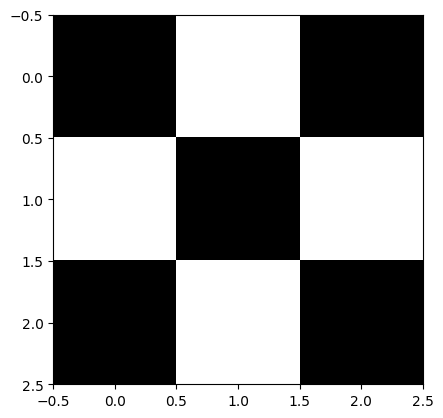

In [ ]:
# Generating the X Pattern
# Run this code to see X pattern

x = 256* np.ones([3,3],dtype = int)

for i in range(3):
    x[i,i] = 0
    x[i,2-i] = 0

plt.imshow(x,cmap='gray')

### Generate Dataset and Train

In [ ]:
# Generate the Dataset
# Initiate empty dataset
dataset = []
image_list = []

# We have 2^9=512 possibilities: loop over them
for i in range(512):
    # generate 9-dimensional vector
    # ============ COMPLETE HERE ================
    # ## COMPLETE ## Multiple lines
    bin_str = np.binary_repr(i, width=9)
    # print(bin_str)
    bin_vec = 256 * np.array([int(b) for b in bin_str])
    # ============================================

    # label the vector
    # ============ COMPLETE HERE ================
    # ## COMPLETE ## Multiple lines
    if i == (2**1 + 2**3 + 2**5 + 2**7):
        label = 1
    else:
        label = 0
    dataset.append([bin_vec,label])
    # ============================================


# Instantiate a perceptron and train it
myModel = PerceptronMachine()
myModel.train(dataset, 0.001)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-47ea79d95816>", line 29, in <cell line: 0>
    myModel.train(dataset, 0.001)
  File "<ipython-input-14-adba39f05242>", line None, in train
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_

### Test Trained Model

In [ ]:
# Initiate the test set
testset = []

# Add the X pattern
testset.append([0, 1, 0, 1, 0, 1, 0, 1, 0])

# Choose some data samples
for i in range(10):
    rand_idx = int(np.random.rand() * 512) % 512
    while rand_idx == 170:
        rand_idx = int(np.random.rand() * 512) % 512
    testset.append(dataset[rand_idx][0])


# Test the set: only the first one should return 1
for test in testset:
    print(f"Is it X patter? Answer: {myModel.forward(test)}")
